# 1d Data Gen

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility (optional)
np.random.seed(42)

# Number of samples
n_samples = 100

# Generate random x values in some range (e.g., 0 to 2)
X = 2 * np.random.rand(n_samples)

# Generate noise (mean 0, with some standard deviation)
noise = np.random.randn(n_samples) * 20.0  # Adjust 50.0 to control noise level

# True relationship: y = 509*x + noise
y = 509 * X + noise

# Create a Pandas DataFrame
df = pd.DataFrame({
    'x': X,
    'y': y
})

pred = df.x * 509

plt.scatter(df.x, df.y)
plt.plot(df.x,pred)


# Save to CSV
df.to_csv('data_lin_reg.csv', index=False)

print("Data generated and saved to 'data.csv'.")


# Kaggle data
https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/data

BHK: Number of Bedrooms, Hall, Kitchen.

Rent: Rent of the Houses/Apartments/Flats.

Size: Size of the Houses/Apartments/Flats in Square Feet.

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.

Area Locality: Locality of the Houses/Apartments/Flats.

City: City where the Houses/Apartments/Flats are Located.

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.

Bathroom: Number of Bathrooms.

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/house-rent-prediction-dataset")

print("Path to dataset files:", path)

In [106]:
import os
import pandas as pd

# os.listdir(path)

In [107]:
# df = pd.read_csv(os.path.join(path, "House_Rent_Dataset.csv")) # /, \
df = pd.read_csv(os.path.join("House_Rent_Dataset.csv")) # /, \

# Basic EDA

In [ ]:
df

In [ ]:
df.info()

In [6]:
assert df.isna().sum().sum() == 0, "Problem"

In [ ]:
df.describe()

In [8]:
df_categ = df.select_dtypes("object")

In [ ]:
df_categ.nunique()

In [ ]:
df_categ.Floor.unique()

In [53]:
COLS_TO_DROP = ["Area Locality", "Posted On", "Floor"]

# df_categ.drop(columns=COLS_TO_DROP, inplace=True)
df.drop(columns=COLS_TO_DROP, inplace=True)


In [54]:
import plotly.express as px

In [ ]:
df.value_counts("Area Type")

In [ ]:
px.bar(df.value_counts("Area Type"))

# Encoding categorical features
https://www.youtube.com/watch?v=589nCGeWG1w

## One Hot Encoding

In [ ]:
df.value_counts("City")

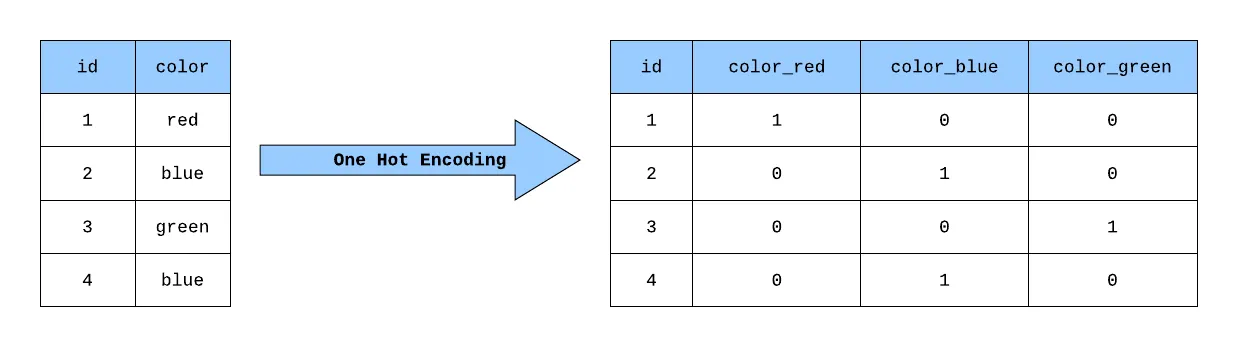

`pip install scikit-learn` or \
`conda install scikit-learn`

NOT SKLEARN

In [56]:
from sklearn.preprocessing import OneHotEncoder

# https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
city = df[["City"]]
city

In [ ]:
ohe = OneHotEncoder(sparse_output=False)

ohe.fit(city)

In [58]:
city_transformed = ohe.transform(city)

In [ ]:
city_transformed

In [ ]:
pd.DataFrame(city_transformed)

In [ ]:
ohe.get_feature_names_out()

In [ ]:
encoded_city = pd.DataFrame(city_transformed, columns=ohe.get_feature_names_out())
encoded_city

In [ ]:
pd.concat([df, encoded_city], axis=1)

### Problem with OHE

In [ ]:
encoded_city

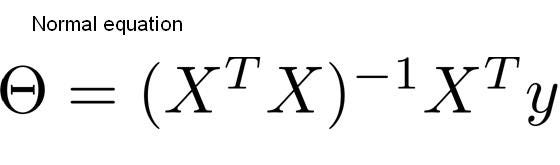

In [ ]:
encoded_city.iloc[:, :-1]

In [ ]:
1 - encoded_city.iloc[:, :-1].sum(axis=1)

In [67]:
sum_of_rest = encoded_city.iloc[:, :-1].sum(axis=1)

In [68]:
res = 1 - sum_of_rest

In [ ]:
encoded_city.iloc[:, -1] == res

In [ ]:
all(encoded_city.iloc[:, -1] == res)

In [71]:
import numpy as np

In [72]:
X_X_t = encoded_city @ encoded_city.T

In [ ]:
np.linalg.inv(X_X_t)

In [ ]:
np.linalg.det(X_X_t)

#### Removing duplicates

In [ ]:
df.duplicated()

In [ ]:
np.any(df.duplicated())

In [48]:
df = df[~df.duplicated()]

### Solution

In [49]:
ohe = OneHotEncoder(sparse_output=False, drop="first")

encoded_city_fixed = ohe.fit_transform(city)


In [ ]:
pd.DataFrame(encoded_city_fixed, columns=ohe.get_feature_names_out())

### OHE with Pandas

In [ ]:
pd.get_dummies(city)

In [ ]:
pd.get_dummies(city, drop_first=True)

## LabelEncoding

In [77]:
furnish = df["Furnishing Status"]

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

furnish_le = le.fit_transform(furnish)
furnish_le

In [ ]:
df["Furnish_le"] = furnish_le

df

In [ ]:
df.drop_duplicates("Furnishing Status")

In [ ]:
df.value_counts("Area Type")

In [ ]:
area_type_le = le.fit_transform(df["Area Type"])


In [ ]:
df["area_type_le"] = area_type_le

In [ ]:
df.drop_duplicates("Area Type")

### Problem with LE
Super Area - Built Area	= 2 * Carpet Area





## Solution - Ordinal Encoding

In [83]:
mappings = {
    "Unfurnished": 0,
    "Semi-Furnished": 0.5,
    "Furnished": 1
}

df["Furnishing OE"] = df["Furnishing Status"].map(mappings)

In [ ]:
df

## Target Encoding (BE CAREFULL!!!)

https://www.youtube.com/watch?v=589nCGeWG1w

In [ ]:
df["Point of Contact"].value_counts()

In [ ]:
df.groupby("Point of Contact")["Rent"].mean()

`pip install category_encoders`
https://contrib.scikit-learn.org/category_encoders/

In [ ]:
!pip install category_encoders

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

In [ ]:
!pip install category_encoders==2.5.0


In [ ]:
import category_encoders as ce

col = "Point of Contact"

target_enc = ce.TargetEncoder(cols=[col])

target_enc.fit(df[col], df['Rent'])

df['Point_of_Coutact_encoded'] = target_enc.transform(df[col])


In [ ]:
df

In [ ]:
df.groupby("Point of Contact")["Rent"].mean()

## Some preprocessing

In [ ]:
df["Area Type"].value_counts()

In [ ]:
df = df[df["Area Type"] != "Built Area"]

df["Area Type"].value_counts()

In [ ]:
df["Point of Contact"].value_counts()

In [37]:
df = df[df["Point of Contact"] != "Contact Builder"]

## Putting all together

In [ ]:
df.drop(columns=["Point_of_Coutact_encoded"], inplace=True)

In [91]:
COLS_OHE = ["Area Type", "City", "Tenant Preferred", \
            "Point of Contact"]


In [ ]:
data_OHE = pd.get_dummies(df[COLS_OHE], drop_first=True)

In [44]:
df = pd.concat([df, data_OHE], axis=1)

In [45]:
df.drop(columns=COLS_OHE, inplace=True)

In [93]:
mappings = {
    "Unfurnished": 0,
    "Semi-Furnished": 0.5,
    "Furnished": 1
}
df["Furnishing Status"] = df["Furnishing Status"].map(mappings)

In [ ]:
df

# Linear Regression with Scikit-learn

# ToDo - Make sure we drop irrelevant features

In [ ]:
df

In [ ]:
df = df[["BHK", "Rent",	"Size",	"Bathroom"]]

In [ ]:
X = df
y = df["Rent"]

In [ ]:
X.head(1)

In [ ]:
y.head(1)

In [232]:
from sklearn.linear_model import LinearRegression


In [ ]:
X

In [ ]:
model = LinearRegression()
model.fit(X, y)

In [ ]:
print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df

In [116]:
pd.options.display.float_format = '{:.6f}'.format


In [ ]:
coef_df

### Fixing issue

In [ ]:
X

In [134]:
df = df[["BHK", "Rent",	"Size_min_max",	"Bathroom_min_max"]]

In [ ]:
X = df.drop(columns=["Rent"])
y = df["Rent"]

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficient(s):", model.coef_)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coef_df

### 21 Jan

### Interpreting coefficents

**Note**
- In practice, we would first of all evaluate our model, and only then try to interpret it.

$y_{initial} = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2$

Increase $x_1$ by 1

$y_{new} = \theta_0 + \theta_1 * (x_1 + 1) + \theta_2 * x_2 = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + \theta_1$

$y_{new} - y_{initial} = \theta_1$

In [ ]:
coef_df.sort_values("Coefficient", ascending=False)


**Size = 39.747316**
- For each additional square meter (or whichever unit “Size” represents), the rent on average increases by about 39.75 units of currency, holding other factors constant. (c. p)

**City_Hyderabad = -15172.606293**
- Being in Hyderabad (vs. baseline) on average leads to a 15172.61 decrease in predicted rent on average c. p.

**Note**
- Ceteris paribus (a Latin phrase, meaning "other things equal"))


**Important**: We should not just sort the values, but rather sort them based on their absolute value

In [ ]:
coef_df.sort_values("Coefficient", key=abs, ascending=False)


Why is size so not important, it does not make any sense

In [ ]:
df[["Size", "Bathroom"]].describe()

# Feature Scaling

In [ ]:
10 - 100

30 

30 - 10 = 20

20 / 90

min -> 0
max -> 1

In [ ]:
px.histogram(df, ["Size", "Bathroom"])

## Min Max Scaling

In [ ]:
px.histogram(df, "Size")

In [ ]:
def min_max_scale(df, col):
    return (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df["Size_min_max"] = min_max_scale(df, "Size")
df["Bathroom_min_max"] = min_max_scale(df, "Bathroom")

px.histogram(df, ["Size_min_max", "Bathroom_min_max"])


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['Size', 'Bathroom']])

scaled_data = scaler.transform(df[['Size', 'Bathroom']])

df[['Size_minmax', 'Bathroom_minmax']] = scaled_data

df.iloc[:,-4:]

## Standard Scaling

In [ ]:
def standard_scale(df, col):
    """
    Standardize a single column to have mean 0 and std dev 1:
         z = (x - mean) / std
    """
    return (df[col] - df[col].mean()) / df[col].std()

df["Size_std_manual"] = standard_scale(df, "Size")
df["Bathroom_std_manual"] = standard_scale(df, "Bathroom")


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df[['Size', 'Bathroom']])

scaled_data = scaler.transform(df[['Size', 'Bathroom']])

df[['Size_standard', 'Bathroom_standard']] = scaled_data

df.iloc[:, -4:]


In [ ]:
px.histogram(df, ["Size_std_manual", "Bathroom_std_manual"])

# Train Test Split

In [150]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import plotly.express as px
import plotly.graph_objects as go


In [ ]:
np.random.seed(509)

num_samples = 100
theta_0_true = 4
theta_1_true = 3

X = np.random.rand(num_samples, 1)
y = theta_0_true + theta_1_true * X
df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})
df

In [ ]:
px.scatter(df, "x", "y")

### SETTING THE SEED IS IMPORTANT

In [ ]:
import numpy as np

np.random.seed(1)

print(np.random.randint(1,100))
print(np.random.randint(1,100))

#### Adding noise

In [222]:
np.random.seed(50004)

X = np.random.rand(200, 1)
y = theta_0_true + theta_1_true * X + np.random.randn(200, 1) / 3
df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})

In [ ]:
x_vals = np.linspace(0, 1, 100)
y_vals = theta_0_true + theta_1_true * x_vals

fig = px.scatter(df, "x", "y")

fig.add_trace(go.Scatter(x=x_vals, y=y_vals, mode='lines', name='True Line'))

fig.show()



#### First work with a few points

In [ ]:
df_small = df.sort_values("x").head(3)
df_small

In [ ]:
# show fig but xlim to 0.012
fig.update_layout(xaxis=dict(range=[df_small.x.min()-0.01, df_small.x.max()+0.01]), 
                  yaxis=dict(range=[df_small.y.min()-0.01, df_small.y.max()+0.01]))
fig.show()

In [226]:
X = df_small[["x"]]
y = df_small["y"]

#### 10th degree polynomial

In [ ]:
x 
3
4
5
6
7

theta_0 * 1 + theta_1 * x + theta_2 * x^2 + theta_3 * x_3

ax^2 + bx + c

In [ ]:
data = pd.DataFrame()

data["intercept"] = np.ones(7)
data["x"] = np.array([1,2,3,4,5,6,7])
data["x2"] = data["x"] ** 2
data["x3"] = data["x"] ** 3

data

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X = df_small[["x"]]
y = df_small["y"]

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

# Polynomial regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

In [ ]:
model_poly.coef_

In [ ]:
1 * -1.159 + 8 + -4.64 + 8^^2 4.58301265e

In [ ]:
pd.DataFrame(X_poly), y

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X = df_small[["x"]]
y = df_small["y"]

x_vals = np.linspace(X.min(), X.max(), 100).reshape(-1,1)

# X = pd.DataFrame(np.array([1,2,3]))
# Polynomial regression
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

# print(X)
# print(pd.DataFrame(X_poly))

model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Predictions for polynomial regression
x_vals_poly = poly.transform(x_vals)
y_pred_poly = model_poly.predict(x_vals_poly)

# Linear regression
model_line = LinearRegression()
model_line.fit(X, y)

# Predictions for linear regression
y_pred_line = model_line.predict(x_vals)

# Plotting
fig = px.scatter(df_small, "x", "y", title="Actual Data, True Line, Line Fit, and Poly Fit")
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=y_pred_poly.flatten(), mode='lines', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=y_pred_line.flatten(), mode='lines', name='Line Fit'))
fig.show()


In [ ]:
X_all = df[["x"]]
y_all = df["y"]

# predict the models on all data
y_pred_line_all = model_line.predict(X_all)
y_pred_poly_all = model_poly.predict(poly.transform(X_all))

# plot the predictions
fig = px.scatter(df, "x", "y", title="Actual Data, Line Fit, Poly Fit")
fig.add_trace(go.Scatter(x=df["x"], y=y_pred_line_all.flatten(), mode='markers', name='Line Fit'))
fig.add_trace(go.Scatter(x=df["x"], y=y_pred_poly_all.flatten(), mode='markers', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))

fig.show()


#### Errors

In [ ]:
small_line_mse = mean_squared_error(y, model_line.predict(X))
small_poly_mse = mean_squared_error(y, model_poly.predict(poly.transform(X)))

all_line_mse = mean_squared_error(y_all, model_line.predict(X_all))
all_poly_mse = mean_squared_error(y_all, model_poly.predict(poly.transform(X_all)))

print(f"Small Data MSE - Line: {small_line_mse:.5f}")
print(f"Small Data MSE - Poly: {small_poly_mse:.5f}")
print()
print(f"All Data MSE - Line: {all_line_mse:.5f}")
print(f"All Data MSE - Poly: {all_poly_mse:.5f}")

### Solution - split the data

In [ ]:
num_samples = 30

X = np.random.rand(num_samples, 1)
y = theta_0_true + theta_1_true * X + np.random.randn(num_samples, 1) / 3

df = pd.DataFrame({'x': X.flatten(), 'y': y.flatten()})

X = df[["x"]]
y = df["y"]
px.scatter(df, "x", "y")


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=509)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [261]:
# Linear regression
model_line = LinearRegression()
model_line.fit(X_train, y_train)

y_train_pred_line = model_line.predict(X_train)
y_test_pred_line = model_line.predict(X_test)

# Polynomial regression
model_poly = LinearRegression()
poly = PolynomialFeatures(degree=40)
poly.fit(X_train)

model_poly.fit(poly.transform(X_train), y_train)

y_train_pred_poly = model_poly.predict(poly.transform(X_train))

y_test_pred_poly = model_poly.predict(poly.transform(X_test))

#### Just a line

In [ ]:
print("Train MSE - Line:", mean_squared_error(y_train, y_train_pred_line))
print("Test MSE - Line:", mean_squared_error(y_test, y_test_pred_line))
print()
print("Train MSE - Poly:", mean_squared_error(y_train, y_train_pred_poly))
print("Test MSE - Poly:", mean_squared_error(y_test, y_test_pred_poly))

import plotly.express as px

# Bar plots for Train and Test MSE
mse_data = {
    'Data': ['Train', 'Test'],
    'Line': [mean_squared_error(y_train, y_train_pred_line), mean_squared_error(y_test, y_test_pred_line)],
    'Poly': [mean_squared_error(y_train, y_train_pred_poly), mean_squared_error(y_test, y_test_pred_poly)]
}

mse_df = pd.DataFrame(mse_data)

fig = px.bar(mse_df, x='Data', y=['Line', 'Poly'], barmode='group', title='Train and Test MSE for Line and Poly Models')
fig.update_layout(yaxis_title='Mean Squared Error')
fig.show()

In [ ]:
# x_vals = np.linspace()

# Sort the dataframe by 'x' values
df_sorted = df.sort_values(by='x')

# Extrapolate model to predict the entire range of x values
y_pred_line = model_line.predict(df_sorted[['x']])
y_pred_poly = model_poly.predict(poly.transform(df_sorted[['x']]))

fig = px.scatter(df_sorted, "x", "y", title="Actual Data, Line Fit, Poly Fit")
fig.add_trace(go.Scatter(x=df_sorted["x"], y=y_pred_line.flatten(), mode='lines', name='Line Fit'))
fig.add_trace(go.Scatter(x=df_sorted["x"], y=y_pred_poly.flatten(), mode='lines', name='Poly Fit'))
fig.add_trace(go.Scatter(x=x_vals.flatten(), y=theta_0_true + theta_1_true * x_vals.flatten(), mode='lines', name='True Line'))

fig.show()


In [ ]:
fig.update_layout(xaxis=dict(range=[X.min(), X.max()]), 
                  yaxis=dict(range=[y.min(), y.max()]))

# Underfitting and Overfitting

Underfitting:
- Շարքային Սողոմոնյան - https://www.youtube.com/watch?v=pv_4MVcjEik
Overfitting:
- Եթե կլոր ա ուրեմն մեջինը քառակուսի ա - https://www.youtube.com/watch?v=7arnxebkEUU 



## Examples

### Overfitting: Astrological Predictions in Ancient Civilizations**
**Historical Backdrop:**
From Babylonian times onward, countless astrologers meticulously charted the positions of celestial bodies, connecting them with floods, famines, victories in war, and the births of royals.

**Why it’s Overfitting:**
- Ancient astrologers often looked at every tiny “coincidence” between a planetary alignment and historical events, building extremely specific rules. (E.g., “When Mars is in Taurus and the moon is half full, there will be a great harvest if the newborn prince is left-handed!”)
- These detailed “models” fit prior observations too well, often capturing noise and coincidences rather than robust truths.

**Moral of the Story:** 
Squeezing meaning out of every alignment of the stars is like overfitting on random noise in a dataset!

### Underfitting: “Bleeding” as a Medieval Medical Treatment
**Historical Backdrop:**
For centuries, a common medical practice in Europe was bloodletting—draining blood to “rebalance the humors” and cure ailments from headaches to fevers.

**Why it’s Underfitting:**
- The medical “model” at the time was extremely simplistic: “Something’s wrong? Let’s remove blood.”
- They applied the same one-size-fits-all approach to all sorts of diseases, ignoring the huge variability between different medical conditions (and patients).
- Because the underlying theory was so rudimentary (the four humors concept), the “model” rarely fit the real complexity of physiology.
  
**Moral of the Story:**
 When your theory is too general and ignores most of the nuanced details, you’re underfitting the complexity of reality (and might end up making people worse).

### Overfitting: Your Uncle’s Hyper-Specific Sports Superstitions
**Everyday Fun Example:**
Maybe you have an uncle who insists on wearing the exact same (unwashed) socks during every big game, needs to place the remote exactly 5 inches from the TV, and can only eat “lucky peanuts” if the score is tied.

**Why it’s Overfitting:**
- He’s discovered a string of coincidences: whenever he did those specific rituals, his team happened to win.
- He’s latched onto every tiny detail—like someone building an overly complex machine-learning model that memorizes all the noise in the training data.
- The moment “new data” arrives—i.e., the team loses despite the lucky peanuts—his model is proven to have no real predictive power.

**Moral of the Story:** 
If your “model” requires that many hyper-specific conditions to “succeed,” it’s probably not robust!

## Demo

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------------------------
# 1. Generate Synthetic Data (True degree = 3)
# ------------------------------------------------------------------------------
np.random.seed(509)
poly_degree = 20

# True polynomial function (3rd degree)
def true_function(x):
    # Example: y = 1 + 2x + 3x^2 + 4x^3, plus random noise
    return 1 + 2*x + 3*x**2 + 4*x**3 + np.random.normal(0, 20, size=x.shape)

def true_function_without_noise(x):
    return 1 + 2*x + 3*x**2 + 4*x**3

# Generate data
N = 100
X = np.linspace(-3, 3, N).reshape(-1, 1)
y = true_function(X.ravel())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# ------------------------------------------------------------------------------
# 2. Fit Polynomial Models of Degree 1 to 10 & Record MSE
# ------------------------------------------------------------------------------
degrees = range(1, poly_degree)
train_mses = []
test_mses = []
polynomial_predictions = {}  # Store predictions for plotting

# A dense grid for plotting model predictions
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

for d in degrees:
    # Create polynomial features
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly  = poly.transform(X_test)
    X_plot_poly  = poly.transform(X_plot)
    
    # Fit linear regression on polynomial features
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predict on train and test
    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)
    
    # Calculate MSE
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test,  y_test_pred)
    
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
    # Store predictions for the plotting slider
    y_plot_pred = model.predict(X_plot_poly)
    polynomial_predictions[d] = y_plot_pred

# ------------------------------------------------------------------------------
# 3. Plot MSE vs. Polynomial Degree (Line Chart)
# ------------------------------------------------------------------------------
df_mse = {
    'Degree': list(degrees),
    'Train MSE': train_mses,
    'Test MSE': test_mses
}

fig_mse = px.line(
    df_mse, 
    x='Degree', 
    y=['Train MSE', 'Test MSE'], 
    markers=True,
    title="Train & Test MSE vs. Polynomial Degree"
)
fig_mse.update_layout(
    xaxis = dict(dtick=1),
    yaxis_title="MSE"
)

# ------------------------------------------------------------------------------
# 4. Interactive Plot: Data + Fitted Polynomials (Slider)
# ------------------------------------------------------------------------------
# We'll create a figure with:
#   - Scatter of the training data
#   - Scatter of the test data (optional, or we can mark them differently)
#   - A line that updates for each polynomial degree using frames.

# Base scatter (training data)
scatter_train = go.Scatter(
    x=X_train.ravel(), 
    y=y_train, 
    mode='markers',
    name='Train Data',
    marker=dict(color='blue', size=6)
)

# Optionally, scatter for test data
scatter_test = go.Scatter(
    x=X_test.ravel(), 
    y=y_test, 
    mode='markers',
    name='Test Data',
    marker=dict(color='red', size=6)
)

# We'll build frames for each polynomial degree
frames = []
for d in degrees:
    # Create a line trace for the polynomial prediction at degree d
    line_pred = go.Scatter(
        x=X_plot.ravel(),
        y=polynomial_predictions[d],
        mode='lines',
        line=dict(width=3),
        name=f"Degree {d} fit"
    )
    frames.append(
        go.Frame(
            data=[scatter_train, scatter_test, line_pred],
            name=str(d)
        )
    )

# Initial line (degree=1 by default)
init_line = go.Scatter(
    x=X_plot.ravel(),
    y=polynomial_predictions[1],
    mode='lines',
    line=dict(width=3),
    name=f"Degree 1 fit"
)

# Build the figure with the first frame's data
fig_poly = go.Figure(
    data=[scatter_train, scatter_test, init_line],
    layout=go.Layout(
        title="Polynomial Fits (Degree Slider)",
        xaxis=dict(title="X"),
        yaxis=dict(title="y"),
        updatemenus=[  # Slider button settings
            dict(
                type="buttons",
                showactive=False,
                x=1.15,
                y=1.15,
                xanchor="right",
                yanchor="top",
                buttons=[
                    dict(label="Play",
                         method="animate",
                         args=[None, 
                               dict(frame=dict(duration=500, redraw=True),
                                    fromcurrent=True,
                                    transition=dict(duration=300)
                                   )
                              ]
                        )
                ]
            )
        ],
        # We'll define sliders next
        sliders=[{
            'currentvalue': {'prefix': 'Degree: ', 'xanchor': 'right'},
            'steps': [
                {
                    'label': str(d),
                    'method': 'animate',
                    'args': [[str(d)], 
                             dict(mode='immediate',
                                  frame=dict(duration=300, redraw=True),
                                  transition=dict(duration=300))]
                }
                for d in degrees
            ]
        }]
    ),
    frames=frames
)

# add the true function to fig_poly
true_y = true_function_without_noise(X_plot.ravel())
fig_poly.add_trace(go.Scatter(x=X_plot.ravel(), y=true_y, mode='lines', name='True Function'))




# ------------------------------------------------------------------------------
# 5. Show the plots
# ------------------------------------------------------------------------------
fig_poly.show()
fig_mse.show()


## Bias Variance decomposition
https://scott.fortmann-roe.com/docs/BiasVariance.html

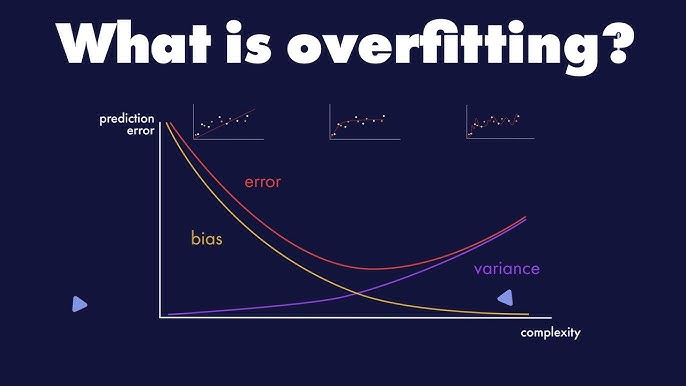

In [ ]:
x_vals

# 23 Jan

# Evaluation

## Classics
Go to PDF

## Pearson and Spearman Correlation

In [181]:
### Pearson's vs Spearman's Correlation in Python
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Generate sample data
np.random.seed(509)
x = np.linspace(1, 100, 100)
y_linear = 2 * x + np.random.normal(0, 10, size=len(x))  # Linear relationship
y_monotonic = np.log(x) + np.random.normal(0, 0.2, size=len(x))  # Monotonic but not linear
y_outlier = y_linear.copy()
y_outlier[-1] += 50_900  # Add an outlier

In [182]:
# Calculate correlation values
pearson_linear = pearsonr(x, y_linear)[0]
spearman_linear = spearmanr(x, y_linear)[0]

pearson_monotonic = pearsonr(x, y_monotonic)[0]
spearman_monotonic = spearmanr(x, y_monotonic)[0]

pearson_outlier = pearsonr(x, y_outlier)[0]
spearman_outlier = spearmanr(x, y_outlier)[0]

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Pearson's linear correlation example
fig1 = px.scatter(x=x, y=y_linear, title=f"Linear Relationship | Pearson - {pearson_linear:.2f} | Spearman - {spearman_linear:.2f}")
fig1.add_trace(go.Scatter(x=x, y=y_linear, mode='markers'))
fig1.update_layout(xaxis_title="X", yaxis_title="Y")
fig1.show()

# Spearman's monotonic relationship example
fig2 = px.scatter(x=x, y=y_monotonic, title=f"Monotonic Relationship | Pearson - {pearson_monotonic:.2f} | Spearman - {spearman_monotonic:.2f}")
fig2.add_trace(go.Scatter(x=x, y=y_monotonic, mode='markers'))
fig2.update_layout(xaxis_title="X", yaxis_title="Y (Rank-based)")
fig2.show()

# Pearson with outlier example
fig3 = px.scatter(x=x, y=y_outlier, title=f"Outlier | Pearson - {pearson_outlier:.2f} | Spearman - {spearman_outlier:.2f}")
fig3.add_trace(go.Scatter(x=x, y=y_outlier, mode='markers'))
fig3.update_layout(xaxis_title="X", yaxis_title="Y")
fig3.show()

# Spearman on sine wave
x = np.linspace(0, 1 * np.pi, 100)
y = np.sin(x)

pearson_sine = pearsonr(x, y)[0]
spearman_sine = spearmanr(x, y)[0]

fig4 = px.scatter(x=x, y=y, title=f"Sine Wave | Pearson - {pearson_sine:.2f} | Spearman - {spearman_sine:.2f}")
fig4.add_trace(go.Scatter(x=x, y=y, mode='markers'))
fig4.update_layout(xaxis_title="X", yaxis_title="Y")
fig4.show()


## Pearson's Correlation (r)
- Measures the **linear relationship** between two variables.
- Assumes data is normally distributed.
- **Sensitive to outliers**.
- Values range from -1 to +1:
  - **+1**: Perfect positive linear correlation.
  - **-1**: Perfect negative linear correlation.
  - **0**: No linear correlation.

### Formula:
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}
$$

## Spearman's Correlation (ρ)
- Measures the **monotonic relationship** between two variables.
- Does **not assume normality** (non-parametric).
- **Robust against outliers**.
- Values range from -1 to +1:
  - **+1**: Perfect positive monotonic relationship.
  - **-1**: Perfect negative monotonic relationship.
  - **0**: No monotonic relationship.

### Formula:
$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$
- $d_i$: Difference between ranks of $x_i$ and $y_i$.
- $n$: Number of pairs.

## When to Use:
| **Criteria**             | **Pearson**              | **Spearman**             |
|---------------------------|--------------------------|--------------------------|
| **Linear Relationship**   | Yes                     | No                      |
| **Monotonic Relationship**| No                      | Yes                     |
| **Outlier Sensitivity**   | High                    | Low                     |
| **Normality Assumption**  | Yes                     | No                      |

---
"""


## Visual evaluation + Codes

In [184]:
model = LinearRegression()
model.fit(X_train_poly, y_train)


y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

In [185]:
# https://github.com/HaykTarkhanyan/coder_moder/blob/main/ml/regression_evaluation_report.py
def evaluate_regression(actual, predictions,
    model_name=None, filename=None, notes=None,
    return_metrics=False, show_plots=False,
    show_metrics=True, plots=False, round_digits=3):
    """
    Function to evaluate a regression model.

    .. warning::
        Assumes that ``scipy``, ``sklearn``, and ``matplotlib`` are installed
        in your environment.

    This function:
        - Prints R2, MAE, MSE, RMSE metrics.
        - Prints Kendall's tau, Pearson's R, Spearman's rho correlation metrics.
        - Plots actual vs. predicted values.
        - Plots residuals vs. predicted values.
        - Plots distribution of residuals.
        - Plots predicted vs. actual distribution.
        - Saves results to file (if specified).
        - Returns metrics as a dictionary (if specified).
    Args:
        actual (array-like): Ground-truth target values.
        predictions (array-like): Model predictions.
        model_name (str, optional): Name of the model (for display/record-keeping).
        filename (str, optional): Path to an HTML file to save the results.
        notes (str, optional): Additional notes to include in the saved file (if `filename` is provided).
        return_metrics (bool, optional): If True, returns a dictionary of metrics. Defaults to False.
        show_plots (bool, optional): If True, calls `plt.show()` for each figure. Defaults to False.
        show_metrics (bool, optional): If True, prints the metrics and correlations to stdout. Defaults to True.
        plots (bool, optional): If True, generates plots. Defaults to False.
        round_digits (int, optional): Number of digits to round the metrics. Defaults to 3.

    Returns:
        dict or None: 
            A dictionary of computed metrics if `return_metrics=True`, otherwise None.
    """
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
    from scipy.stats import kendalltau, pearsonr, spearmanr
    from datetime import datetime
    from io import BytesIO
    import base64
    # Ensure inputs are NumPy arrays
    actual = np.array(actual)
    predictions = np.array(predictions)

    def save_figure_to_file(fig):
        """
        Helper function:
        Convert a Matplotlib figure to a base64-encoded PNG for embedding in HTML.
        """
        tmpfile = BytesIO()
        fig.savefig(tmpfile, format='png')
        encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')
        return encoded

    # 1. Calculate regression metrics
    r2 = round(r2_score(actual, predictions), round_digits)
    mae = round(mean_absolute_error(actual, predictions), round_digits)
    mape = round(mean_absolute_percentage_error(actual, predictions), round_digits)
    mse = round(mean_squared_error(actual, predictions), round_digits)
    rmse = round(np.sqrt(mean_squared_error(actual, predictions)), round_digits)

    # 2. Calculate correlation metrics
    pearson = round(pearsonr(actual, predictions)[0], round_digits)
    spearman = round(spearmanr(actual, predictions)[0], round_digits)
    kendall = round(kendalltau(actual, predictions)[0], round_digits)

    # 3. Print metrics if needed
    if show_metrics:
        print(f"Model: {model_name or 'N/A'}")
        print(f"R2: {r2}")
        print(f"MAE: {mae}")
        print(f"MAPE: {mape}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"Pearson Correlation: {pearson}")
        print(f"Spearman Rho: {spearman}")
        print(f"Kendall Tau: {kendall}")

    # 4. Generate plots if requested
    if plots:
        residuals = actual - predictions

        # (a) Predicted vs. Actual
        fig1 = plt.figure()
        plt.scatter(actual, predictions, edgecolor='k', alpha=0.7)
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Predicted vs. Actual")
        # add a diagonal line
        plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=2)
        if show_plots:
            plt.show()
        prediction_vs_actual = save_figure_to_file(fig1)
        plt.close(fig1)

        # (b) Residuals vs. Predicted
        fig2 = plt.figure()
        plt.scatter(predictions, residuals, edgecolor='k', alpha=0.7)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.xlabel("Predicted")
        plt.ylabel("Residual")
        plt.title("Residuals vs. Predicted")
        if show_plots:
            plt.show()
        residuals_vs_predicted = save_figure_to_file(fig2)
        plt.close(fig2)

        # (c) Distribution of Residuals
        fig3 = plt.figure()
        plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
        plt.xlabel("Residual")
        plt.ylabel("Count")
        plt.title("Distribution of Residuals")
        if show_plots:
            plt.show()
        residuals_distribution = save_figure_to_file(fig3)
        plt.close(fig3)

        # (d) Distribution of Predicted vs. Actual
        fig4 = plt.figure()
        plt.hist(actual, bins=30, alpha=0.5, label="Actual", edgecolor='k')
        plt.hist(predictions, bins=30, alpha=0.5, label="Predicted", edgecolor='k')
        plt.xlabel("Value")
        plt.ylabel("Count")
        plt.title("Distribution of Predicted vs. Actual")
        plt.legend()
        if show_plots:
            plt.show()
        predicted_vs_actual_distribution = save_figure_to_file(fig4)
        plt.close(fig4)

    # 5. Save results to file (HTML) if requested
    if filename:
        with open(filename, "w") as f:
            f.write(f"<html><body>\n")
            f.write(f"<h2>Report generated: {datetime.now()}</h2>\n")
            if model_name:
                f.write(f"<h2>Model Name: {model_name}</h2>\n")

            if notes:
                f.write(f"<h3>Notes:</h3>\n<p>{notes}</p>\n")

            f.write("<h3>Metrics</h3>\n")
            f.write(f"<b>R2:</b> {r2} <br>\n")
            f.write(f"<b>MAE:</b> {mae} <br>\n")
            f.write(f"<b>MAPE:</b> {mape} <br>\n")
            f.write(f"<b>MSE:</b> {mse} <br>\n")
            f.write(f"<b>RMSE:</b> {rmse} <br>\n")

            f.write("<h3>Correlations</h3>\n")
            f.write(f"Pearson: {pearson} <br>\n")
            f.write(f"Spearman: {spearman} <br>\n")
            f.write(f"Kendall Tau: {kendall} <br>\n")

            if plots:
                f.write("<h3>Plots</h3>\n")
                f.write(f'<img src="data:image/png;base64,{prediction_vs_actual}"><br><br>\n')
                f.write(f'<img src="data:image/png;base64,{residuals_vs_predicted}"><br><br>\n')
                f.write(f'<img src="data:image/png;base64,{residuals_distribution}"><br><br>\n')
                f.write(f'<img src="data:image/png;base64,{predicted_vs_actual_distribution}"><br><br>\n')

            f.write("</body></html>\n")

    # 6. Optionally return a dictionary of metrics
    if return_metrics:
        return {
            "model_name": model_name,
            "notes": notes,
            "r2": r2,
            "mae": mae,
            "mape": mape,
            "mse": mse,
            "rmse": rmse,
            "pearson": pearson,
            "spearman": spearman,
            "kendall": kendall
        }


In [ ]:
evaluate_regression(y_train, y_train_pred, model_name="Linear Regression", filename="report.html", show_plots=True, plots=True)

In [ ]:
evaluate_regression(y_test, y_test_pred, model_name="Linear Regression", filename="report.html", show_plots=True, plots=True)

# Cross Validation
https://scikit-learn.org/1.5/modules/cross_validation.html

In [ ]:
1 2 3 4 5

1 2 3 4 | 5
1 2 3 5 | 4
1 2 4 5 | 3

# Regulaization
Go to pdf

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ------------------------------------------------------------------------------
# 1. Generate Synthetic Data (True degree = 3)
# ------------------------------------------------------------------------------
np.random.seed(509)

def true_function(x):
    # Example: y = 1 + 2x + 3x^2 + 4x^3, plus random noise
    return 1 + 2*x + 3*x**2 + 4*x**3 + np.random.normal(0, 20, size=x.shape)

def true_function_without_noise(x):
    return 1 + 2*x + 3*x**2 + 4*x**3

# Generate data
N = 100
X = np.linspace(-3, 3, N).reshape(-1, 1)
y = true_function(X.ravel())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ------------------------------------------------------------------------------
# 2. Fix Polynomial Degree = 10, Vary Regularization Strength (alpha)
# ------------------------------------------------------------------------------
degree = 20
model_name = "Ridge"  # "Ridge" or "Lasso"
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]  # Example alpha (lambda) values

# Prepare polynomial features (degree=10) once
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly  = poly.transform(X_test)

# A dense grid for plotting model predictions
X_plot = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)

train_mses = []
test_mses = []
predictions = {}

# Fit a Ridge model for each alpha
for alpha_val in alpha_values:
    if model_name == "Lasso":
        model = Lasso(alpha=alpha_val)
    else:
        model = Ridge(alpha=alpha_val)
    model.fit(X_train_poly, y_train)
    
    # Compute predictions and MSE for train / test
    y_train_pred = model.predict(X_train_poly)
    y_test_pred  = model.predict(X_test_poly)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse  = mean_squared_error(y_test,  y_test_pred)

    train_mses.append(train_mse)
    test_mses.append(test_mse)
    
    # Store predictions on the plotting grid
    y_plot_pred = model.predict(X_plot_poly)
    predictions[alpha_val] = y_plot_pred

# ------------------------------------------------------------------------------
# 3. Plot MSE vs. alpha
# ------------------------------------------------------------------------------
df_mse = {
    'Alpha': alpha_values,
    'Train MSE': train_mses,
    'Test MSE': test_mses
}

fig_mse = px.line(
    df_mse,
    x='Alpha',
    y=['Train MSE', 'Test MSE'],
    markers=True,
    title=f"MSE vs. Alpha (Polynomial Degree = {degree})"
)
# Optionally make the x-axis log scale for clarity:
# fig_mse.update_layout(xaxis_type='log')
fig_mse.update_layout(yaxis_title="MSE")

# ------------------------------------------------------------------------------
# 4. Interactive Plot: Data + Fitted Polynomials (Slider over alpha)
# ------------------------------------------------------------------------------
scatter_train = go.Scatter(
    x=X_train.ravel(), 
    y=y_train, 
    mode='markers',
    name='Train Data',
    marker=dict(color='blue', size=6)
)

scatter_test = go.Scatter(
    x=X_test.ravel(), 
    y=y_test, 
    mode='markers',
    name='Test Data',
    marker=dict(color='red', size=6)
)

true_y = true_function_without_noise(X_plot.ravel())
scatter_true = go.Scatter(
    x=X_plot.ravel(),
    y=true_y,
    mode='lines',
    name='True Function',
    line=dict(dash='dash', color='black')
)

# Create frames for each alpha
frames = []
for alpha_val in alpha_values:
    line_pred = go.Scatter(
        x=X_plot.ravel(),
        y=predictions[alpha_val],
        mode='lines',
        line=dict(width=3),
        name=f"alpha={alpha_val}"
    )
    frames.append(go.Frame(data=[scatter_train, scatter_test, scatter_true, line_pred],
                           name=str(alpha_val)))

# Initial line (use the first alpha in alpha_values)
init_line = go.Scatter(
    x=X_plot.ravel(),
    y=predictions[alpha_values[0]],
    mode='lines',
    line=dict(width=3),
    name=f"alpha={alpha_values[0]}"
)

fig_poly = go.Figure(
    data=[scatter_train, scatter_test, scatter_true, init_line],
    layout=go.Layout(
        title=f"Polynomial Degree={degree} with {model_name} Regularization (Slider: alpha)",
        xaxis=dict(title="X"),
        yaxis=dict(title="y"),
        updatemenus=[
            dict(
                type="buttons",
                showactive=False,
                x=1.15,
                y=1.15,
                xanchor="right",
                yanchor="top",
                buttons=[
                    dict(label="Play",
                         method="animate",
                         args=[None,
                               dict(frame=dict(duration=500, redraw=True),
                                    fromcurrent=True,
                                    transition=dict(duration=300))])
                ]
            )
        ],
        sliders=[{
            'currentvalue': {'prefix': 'Alpha: ', 'xanchor': 'right'},
            'steps': [
                {
                    'label': str(a),
                    'method': 'animate',
                    'args': [[str(a)],
                             dict(mode='immediate',
                                  frame=dict(duration=300, redraw=True),
                                  transition=dict(duration=300))]
                } for a in alpha_values
            ]
        }]
    ),
    frames=frames
)

# ------------------------------------------------------------------------------
# 5. Show the plots
# ------------------------------------------------------------------------------
fig_poly.show()
fig_mse.show()
